<a href="https://colab.research.google.com/github/Whiteomi/Hola_Mundo/blob/main/4_Valores_at%C3%ADpicos_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos librerias requeridas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as  plt

In [ ]:
#Cargar archivo csv desde seaborn
from google.colab import files 
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice 
data = pd.read_csv('Ventas_totales.csv')


In [ ]:
#Verificamos información del DataFrame
data.info()

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data.isnull().sum()
valores_nulos

Procedimiento para eliminar valores nulos en DataFrame 


In [ ]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1=data.fillna(method="bfill")
data1

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe 
data2=data.copy()
data2=data2.fillna(round(data.mean(),1))
data

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data2.isnull().sum()
valores_nulos

<Figure size 1080x576 with 0 Axes>

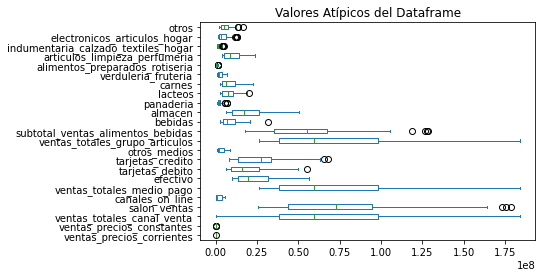

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe 
fig = plt.figure(figsize =(15, 8))
data2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

Procedimiento "Desviación Estandar" para eliminar outliers en dataframe 

In [ ]:
#Metodo aplicando desviación estandar. Encuentro los valores extremos 
y=data2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Encontramos Ouliers del DataFrame 
outliers= data2[(y>Limite_Superior) | (y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos son outliers del Dataframe 
data3= data2[(y<=Limite_Superior) & (y>=Limite_Inferior)]
data3

In [ ]:
#Eliminamos columnas innecesarias 
data4= data3.drop(['indice_tiempo'], axis=1)
data4

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data4.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
data_clean=data4.copy()
data_clean=data_clean.fillna(round(data4.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data_clean.isnull().sum()
valores_nulos

Procedimiento "Cuantiles" para sustituir outliers en dataframe 


In [ ]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 + 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers del Dataframe 
outliers_iqr= data2[(y>Limite_Superior_iqr) | (y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del dataframe 
data3_iqr= data2[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Eliminamos columnas innecesarias 
data4_iqr=data3_iqr.drop(['indice_tiempo'], axis=1)
data4_iqr

In [ ]:
#Corroboramos valores nulos 
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr

In [ ]:
#Unimos la columna 'indice_tiempo' con el dataframe 

indice_tiempo=data2['indice_tiempo']
Datos_limpios=pd.concat([indice_tiempo, data5_iqr], axis=1)
Datos_limpios

In [ ]:
#Corroboramos valores nulos 
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

In [ ]:
#Convertir DataFrame a CSV 
Datos_limpios.to_csv("Datos_limpios.csv")

In [ ]:
#Descargar archivo filtrado en csv 
from google.colab import files 

files.download("Datos_limpios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>